[View in Colaboratory](https://colab.research.google.com/github/vneogi199/See_Food/blob/master/See_Food.ipynb)

In [0]:
#Creating image paths
from os.path import join
hot_dog_image_dir = 'drive/See_Food/seefood/train/hot_dog'
hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg',
                             '3911675.jpg'
                            ]]
not_hot_dog_image_dir = 'drive/See_Food/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['766638.jpg',
                             '99890.jpg',
                             '291636.jpg'
                            ]]

img_paths = hot_dog_paths + not_hot_dog_paths

In [0]:
#Preprocessing images
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs= [load_img(img_path,target_size=(img_height,img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [0]:
#Creating model and predicting
from tensorflow.python.keras.applications import ResNet50
model = ResNet50(weights='drive/See_Food/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
img_data = read_and_prep_images(img_paths)
my_preds = model.predict(img_data)

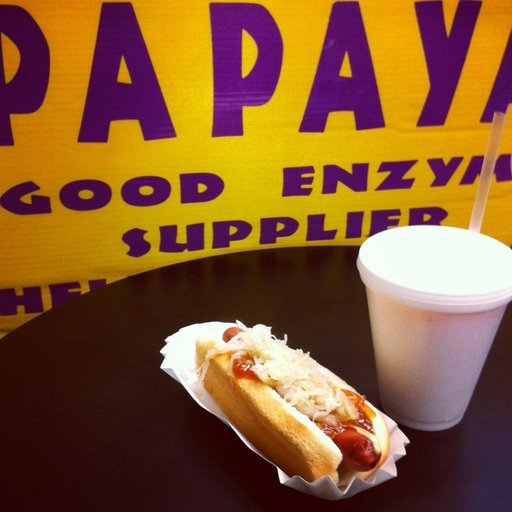

Prediction is hotdog with a confidence of 97.75%

 



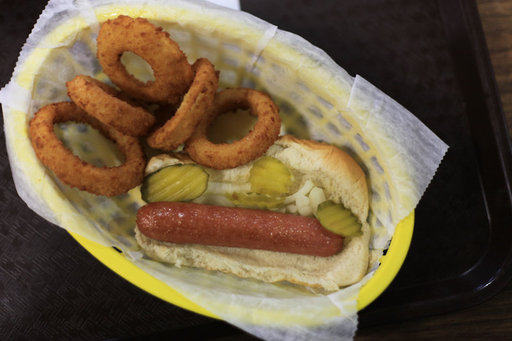

Prediction is hotdog with a confidence of 97.65%

 



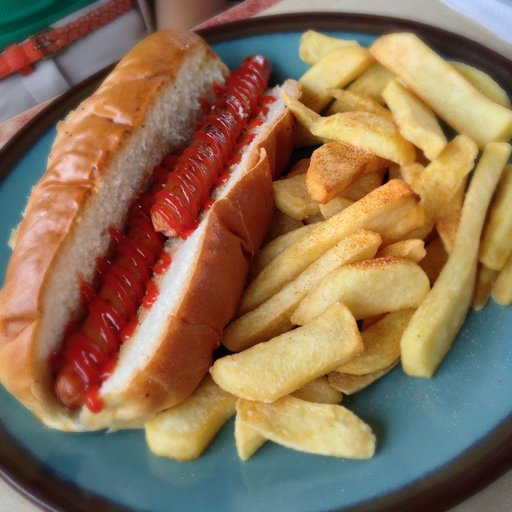

Prediction is hotdog with a confidence of 96.22%

 



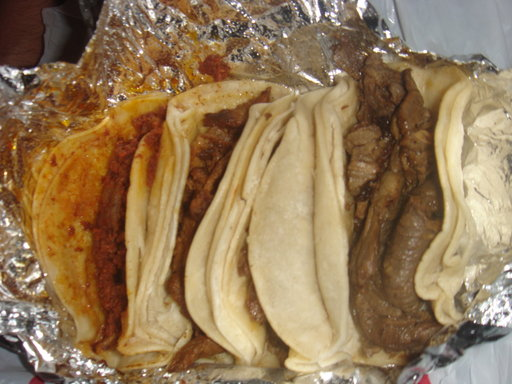

Prediction is burrito with a confidence of 81.88%

 



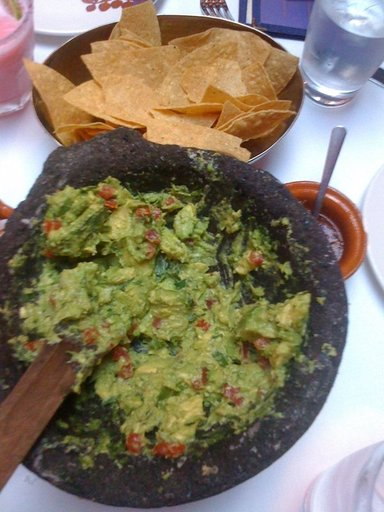

Prediction is guacamole with a confidence of 99.94%

 



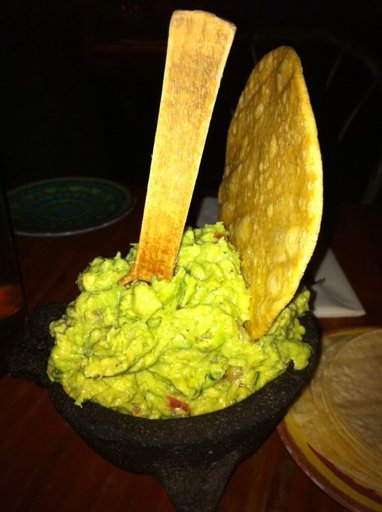

Prediction is guacamole with a confidence of 99.98%

 



In [65]:
#Visualizing the results
import sys

# Add directory holding utility functions to path to allow importing utility funcitons
sys.path.append('drive/See_Food/utils')
from decode_predictions import decode_predictions


from IPython.display import Image, display

most_likely_labels = decode_predictions(my_preds, top=1, class_list_path='drive/See_Food/imagenet_class_index.json') 
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print("Prediction is " + most_likely_labels[i][0][1] + " with a confidence of " + str(round(most_likely_labels[i][0][2] * 100, 2)) + "%")
    print("\n \n")